In [22]:
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt 

In [2]:
import yfinance

In [3]:
data = yfinance.download('SPY','2018-01-01','2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,258.858276,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,260.495544,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,261.593475,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,263.336731,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,263.818329,57319200
...,...,...,...,...,...,...
2019-12-24,321.470001,321.519989,320.899994,321.230011,321.230011,20270000
2019-12-26,321.649994,322.950012,321.640015,322.940002,322.940002,30911200
2019-12-27,323.739990,323.799988,322.279999,322.859985,322.859985,42528800


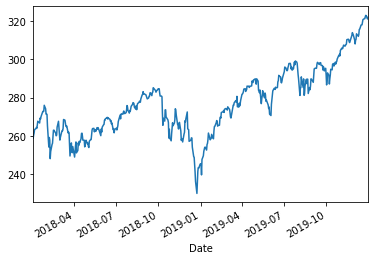

In [6]:
data["Adj Close"].plot()

In [12]:
def getRollingMean(df, window):
    return df.rolling(window=window).mean()

def getRollingStd(df, window):
    return df.rolling(window=window).std()

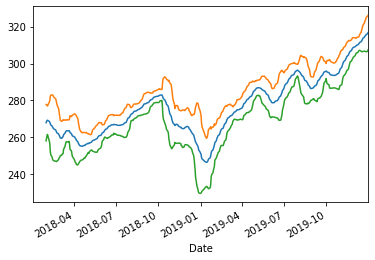

In [16]:
getRollingMean(data["Adj Close"], window=20).plot()
(getRollingMean(data["Adj Close"], window=20) + 2*getRollingStd(data["Adj Close"], window=20)).plot()
(getRollingMean(data["Adj Close"], window=20) - 2*getRollingStd(data["Adj Close"], window=20)).plot()

In [18]:
# returns

data["Adj Close"] / data["Adj Close"].shift(1) - 1

Date
2018-01-02         NaN
2018-01-03    0.006325
2018-01-04    0.004215
2018-01-05    0.006664
2018-01-08    0.001829
                ...   
2019-12-24    0.000031
2019-12-26    0.005323
2019-12-27   -0.000248
2019-12-30   -0.005513
2019-12-31    0.002429
Name: Adj Close, Length: 503, dtype: float64

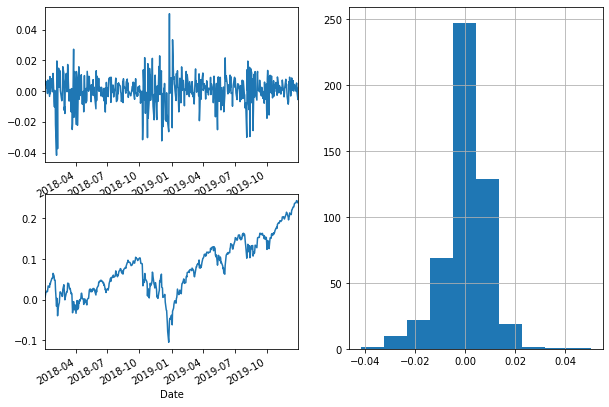

In [45]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(221)
(data["Adj Close"] / data["Adj Close"].shift(1) - 1).plot()

fig.add_subplot(122)
(data["Adj Close"] / data["Adj Close"].shift(1) - 1).hist()

fig.add_subplot(223)
(data["Adj Close"] / data["Adj Close"].shift(1) - 1).cumsum().plot()